# Home work on Machine Learning for Classification

We'll use logistic regression to predict decision of yes/no


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
del df['loan']

In [12]:
del df['default']

In [14]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [18]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[58 44 33 47 35]
77

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown']
12

marital
['married' 'single' 'divorced']
3

education
['tertiary' 'secondary' 'unknown' 'primary']
4

balance
[2143   29    2 1506    1]
7168

housing
['yes' 'no']
2

contact
['unknown' 'cellular' 'telephone']
3

day
[5 6 7 8 9]
31

month
['may' 'jun' 'jul' 'aug' 'oct']
12

duration
[261 151  76  92 198]
1573

campaign
[1 2 3 5 4]
48

pdays
[ -1 151 166  91  86]
559

previous
[0 3 1 4 2]
41

poutcome
['unknown' 'failure' 'other' 'success']
4

y
['no' 'yes']
2



In [20]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
df.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [24]:
df.y = (df.y == 'yes').astype(int)

In [26]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


## Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [32]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [38]:
df_full_train = df_full_train.reset_index(drop=True)

In [40]:
df_full_train.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
df_full_train.y.value_counts(normalize=True)

y
0    0.883931
1    0.116069
Name: proportion, dtype: float64

In [44]:
df_full_train.y.mean()

0.11606945366069453

In [46]:
df.education.mode()

0    secondary
Name: education, dtype: object

In [48]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [50]:
categorical = [
    'job',
    'marital',
    'education',
    'housing',
    'contact',
    'month',
    'poutcome'
]

In [52]:
df_full_train[categorical].nunique()

job          12
marital       3
education     4
housing       2
contact       3
month        12
poutcome      4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

#### Churn rate

In [54]:
df_full_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown,0
1,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown,0
2,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown,0
3,37,management,single,tertiary,-119,yes,unknown,11,jun,375,11,-1,0,unknown,0
4,56,blue-collar,married,primary,3498,no,cellular,15,apr,264,2,-1,0,unknown,1


In [56]:
y_housing_yes = df_full_train[df_full_train.housing == 'yes'].y.mean()
y_housing_yes

0.0759870871616588

In [60]:
y_housing_no = df_full_train[df_full_train.housing == 'no'].y.mean()
y_housing_no

0.16640678600386702

In [62]:
global_y = df_full_train.y.mean()
global_y

0.11606945366069453

#### Risk ratio

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [64]:
from IPython.display import display

In [66]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_y
    df_group['risk'] = df_group['mean'] / global_y
    display(df_group)
    print()
    print()

job


,mean,count,diff,risk
job,,,,
admin.,0.119894,4137,0.003824,1.032947
blue-collar,0.072252,7806,-0.043817,0.622490
entrepreneur,0.086587,1178,-0.029482,0.745997
housemaid,0.093812,1002,-0.022257,0.808243
management,0.135467,7500,0.019397,1.167117
retired,0.222590,1815,0.106520,1.917727
self-employed,0.122862,1286,0.006792,1.058518
services,0.090746,3350,-0.025323,0.781827
student,0.278976,742,0.162906,2.403524




marital


,mean,count,diff,risk
marital,,,,
divorced,0.119720,4143,0.003651,1.031451
married,0.100578,21804,-0.015492,0.866532
single,0.147637,10221,0.031568,1.271973




education


,mean,count,diff,risk
education,,,,
primary,0.086377,5476,-0.029693,0.744183
secondary,0.105303,18670,-0.010767,0.907238
tertiary,0.148970,10539,0.032901,1.283460
unknown,0.127444,1483,0.011375,1.098001




housing


,mean,count,diff,risk
housing,,,,
no,0.166407,16033,0.050337,1.433683
yes,0.075987,20135,-0.040082,0.654669




contact


,mean,count,diff,risk
contact,,,,
cellular,0.148270,23464,0.032200,1.277422
telephone,0.137128,2319,0.021059,1.181431
unknown,0.038613,10385,-0.077456,0.332675




month


,mean,count,diff,risk
month,,,,
apr,0.202645,2344,0.086576,1.745895
aug,0.110954,4966,-0.005115,0.955932
dec,0.464481,183,0.348411,4.001749
feb,0.156723,2112,0.040654,1.350256
jan,0.098678,1135,-0.017391,0.850167
jul,0.091927,5537,-0.024142,0.792000
jun,0.098888,4318,-0.017181,0.851976
mar,0.516043,374,0.399973,4.445983
may,0.065219,10963,-0.050850,0.561900




poutcome


,mean,count,diff,risk
poutcome,,,,
failure,0.126891,3901,0.010821,1.093229
other,0.170341,1497,0.054271,1.467575
success,0.641322,1210,0.525253,5.525332
unknown,0.090392,29560,-0.025677,0.778779


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [68]:
from sklearn.metrics import mutual_info_score

In [70]:
mutual_info_score(df_full_train.y, df_full_train.education)

0.0024578282035066477

In [72]:
mutual_info_score(df_full_train.housing, df_full_train.y)

0.00980003813867901

In [74]:
mutual_info_score(df_full_train.contact, df_full_train.y)

0.014163614885003041

In [76]:
mutual_info_score(df_full_train.month, df_full_train.y)

0.024773565917283587

In [78]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train.y)

In [80]:
mi = df_full_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False)

poutcome     0.029257
month        0.024774
contact      0.014164
housing      0.009800
job          0.007765
education    0.002458
marital      0.002019
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [82]:
df_full_train.age.max()

95

In [84]:
df_full_train[numerical].corrwith(df_full_train.y).abs()

age         0.026684
balance     0.052518
day         0.025887
duration    0.393402
campaign    0.072571
pdays       0.105742
previous    0.092051
dtype: float64

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [86]:
from sklearn.feature_extraction import DictVectorizer

In [88]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [57]:
z = np.linspace(-7, 7, 51)

In [58]:
sigmoid(10000)

1.0

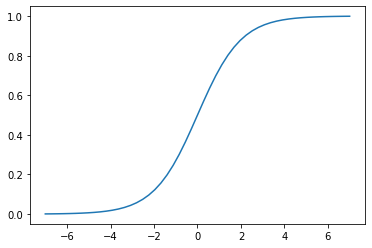

In [59]:
plt.plot(z, sigmoid(z))

In [60]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [61]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [90]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [94]:
y_pred = model.predict_proba(X_val)[:, 1]

In [96]:
y_decision = (y_pred >= 0.5)

In [98]:
(y_val == y_decision).mean()

0.9010174740101747

In [100]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = y_decision.astype(int)
df_pred['actual'] = y_val

In [102]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [104]:
df_pred.correct.mean()

0.9010174740101747

In [106]:
y_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [108]:
small = ['marital', 'education', 'month']

In [110]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [112]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [114]:
dv_small.get_feature_names_out()

array(['education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep'], dtype=object)

In [116]:
X_train_small = dv_small.transform(dicts_train_small)

In [118]:
model_small = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [120]:
w0 = model_small.intercept_[0]
w0

-0.8432373227606149

In [122]:
w = model_small.coef_[0]
w.round(3)

array([-0.435, -0.273, -0.003, -0.132, -0.269, -0.471, -0.103,  0.022,
       -0.729,  1.196, -0.335, -0.814, -0.899, -0.811,  1.373, -1.283,
       -0.859,  1.051,  1.244])

## 3.12 Using the model

In [126]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [128]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [130]:
y_full_train = df_full_train.y.values

In [132]:
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [134]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [136]:
X_test = dv.transform(dicts_test)

In [138]:
y_pred = model.predict_proba(X_test)[:, 1]

In [140]:
y_decision = (y_pred >= 0.5)

In [142]:
(y_decision == y_test).mean()

0.8984850160345018

In [144]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
user = dicts_test[-1]
user

{'job': 'technician',
 'marital': 'married',
 'education': 'secondary',
 'housing': 'no',
 'contact': 'unknown',
 'month': 'jun',
 'poutcome': 'unknown',
 'age': 37,
 'balance': 2209,
 'day': 20,
 'duration': 167,
 'campaign': 2,
 'pdays': -1,
 'previous': 0}

In [148]:
X_small = dv.transform([user])

In [150]:
model.predict_proba(X_small)[0, 1]

0.03414251471603411

In [152]:
y_test[-1]

0

# Question 6

In [156]:
C = [0.01, 0.1, 1, 10, 100]
for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    q6_y_pred = model.predict_proba(X_val)[:, 1]
    q6_y_decision = (q6_y_pred >= 0.5)
    print((y_val == q6_y_decision).mean())
    print()

0.8980314089803141

0.9009068790090687

0.9010174740101747

0.9010174740101747

0.9011280690112807



# Question 5

In [165]:
df_full_train = df_full_train[categorical + numerical]

In [167]:
del df_full_train['age']

In [169]:
dicts_full_train = df_full_train.to_dict(orient='records')

In [171]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [175]:
y_full_train

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [191]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [193]:
X_test = dv.transform(dicts_test)

In [195]:
y_pred = model.predict_proba(X_test)[:, 1]

In [197]:
y_decision = (y_pred >= 0.5)

In [199]:
(y_decision == y_test).mean()

0.899037929890523

In [201]:
del df_full_train['balance']

In [203]:
dicts_full_train = df_full_train.to_dict(orient='records')

In [205]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [207]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [209]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [211]:
X_test = dv.transform(dicts_test)

In [213]:
y_pred = model.predict_proba(X_test)[:, 1]

In [215]:
y_decision = (y_pred >= 0.5)

In [217]:
(y_decision == y_test).mean()

0.8994802609753401

In [219]:
del df_full_train['marital']

In [221]:
dicts_full_train = df_full_train.to_dict(orient='records')

In [223]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [225]:
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [227]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [229]:
X_test = dv.transform(dicts_test)

In [231]:
y_pred = model.predict_proba(X_test)[:, 1]

In [233]:
y_decision = (y_pred >= 0.5)

In [235]:
(y_decision == y_test).mean()

0.8988167643481145

In [237]:
del df_full_train['previous']

In [239]:
dicts_full_train = df_full_train.to_dict(orient='records')

In [241]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [243]:
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [245]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [247]:
X_test = dv.transform(dicts_test)

In [249]:
y_pred = model.predict_proba(X_test)[:, 1]

In [251]:
y_decision = (y_pred >= 0.5)

In [253]:
(y_decision == y_test).mean()

0.8991485126617274